In [1]:
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt

In [2]:
digits = datasets.load_digits()

In [3]:
digits.images[0].shape

(8, 8)

In [4]:
import numpy as np
np.linalg.norm(digits.data[0])

55.40758070878027

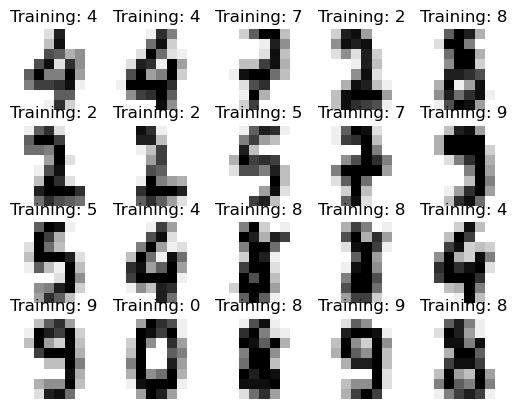

In [5]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[-20:]):
    plt.subplot(4, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

/Users/emilholm/.pyenv/versions/anaconda3-2023.09-0/envs/ml-labs/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/emilholm/.pyenv/versions/anaconda3-2023.09-0/envs/ml-labs/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/emi

[[ 5.2803283 21.268307 ]
 [ 5.9071517 21.496845 ]
 [-3.73468   17.473389 ]
 [ 4.6468315 12.417008 ]
 [-2.1035528  8.4622755]
 [ 4.8414474 12.445632 ]
 [ 5.003756  12.303587 ]
 [-3.0331159  2.4984412]
 [-4.701219  17.6963   ]
 [ 2.8790653  4.4056764]
 [-2.7685614  2.8213441]
 [ 5.7351108 21.4123   ]
 [-3.0366356  8.230603 ]
 [-3.3571181  8.74515  ]
 [ 5.793514  21.108656 ]
 [ 2.596893   5.047635 ]
 [12.466131   6.524074 ]
 [-2.4607723  8.31318  ]
 [ 2.4217973  4.5727363]
 [-1.958369   8.468496 ]] (1797, 2)


Text(0.5, 1.0, 'UMAP projection of the Digits dataset')

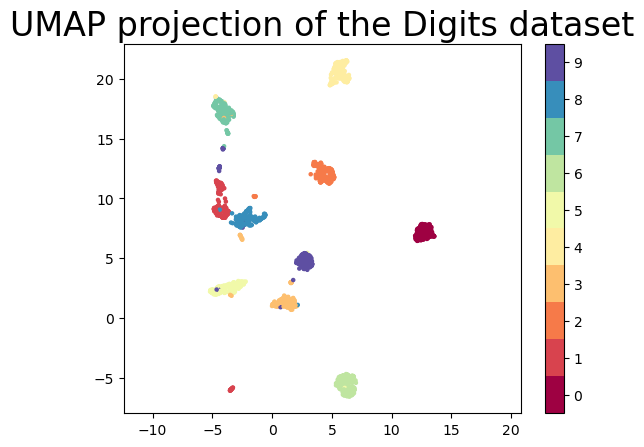

In [6]:
import matplotlib.pyplot as plt 
import numpy as np
import umap.umap_ as umap

reducer = umap.UMAP(random_state=10)
reducer.fit(digits.data)
embedding = reducer.transform(digits.data)

print(embedding[-20:], embedding.shape)

plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24)

In [7]:
mean_imgs = np.array([digits.data[digits.target==i].mean(axis=0) for i in range(10)])
print(type(mean_imgs), type(digits.data), type(mean_imgs[0]), type(digits.data[0]), mean_imgs[0].shape, digits.data[0].shape)
print(type(digits.target[0]), digits.target.shape, mean_imgs.shape)
mean_imgs_image = np.reshape(mean_imgs, (10, 8, 8))
mean_imgs

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> (64,) (64,)
<class 'numpy.int64'> (1797,) (10, 64)


array([[0.00000000e+00, 2.24719101e-02, 4.18539326e+00, 1.30955056e+01,
        1.12977528e+01, 2.92696629e+00, 3.37078652e-02, 0.00000000e+00,
        0.00000000e+00, 8.87640449e-01, 1.25786517e+01, 1.33707865e+01,
        1.14943820e+01, 1.13764045e+01, 9.66292135e-01, 0.00000000e+00,
        0.00000000e+00, 3.73033708e+00, 1.42752809e+01, 5.26404494e+00,
        2.10112360e+00, 1.21685393e+01, 3.52247191e+00, 0.00000000e+00,
        0.00000000e+00, 5.29213483e+00, 1.27134831e+01, 1.99438202e+00,
        1.40449438e-01, 9.06179775e+00, 6.44943820e+00, 0.00000000e+00,
        0.00000000e+00, 5.87078652e+00, 1.15561798e+01, 8.93258427e-01,
        4.49438202e-02, 8.77528090e+00, 7.12359551e+00, 0.00000000e+00,
        0.00000000e+00, 3.49438202e+00, 1.32865169e+01, 1.65168539e+00,
        1.53370787e+00, 1.13089888e+01, 5.85393258e+00, 0.00000000e+00,
        0.00000000e+00, 7.97752809e-01, 1.30561798e+01, 9.96067416e+00,
        1.03483146e+01, 1.32528090e+01, 2.41573034e+00, 0.000000

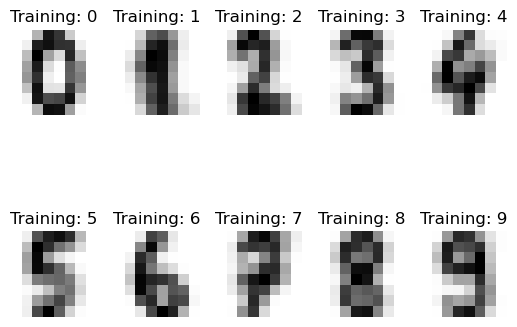

In [8]:
images_and_labels = list(zip(mean_imgs_image, digits.target[:10]))
for index, (image, label) in enumerate(images_and_labels):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [9]:
#
from numpy import linalg


l2_norm_array_raw= np.array([linalg.norm(v) for v in digits.data])

l2_norm_array_mean = np.array([linalg.norm(v) for v in mean_imgs])

print(l2_norm_array_raw.shape, l2_norm_array_mean.shape)

(1797,) (10,)


In [10]:
cosine_matrix = np.zeros

In [11]:
#4.3
def cosine_similarity_matrix(data, norm_data):
    vals = list(zip(data, norm_data))
    N = len(data)
    ret = np.zeros((N, N))
    for idx, (v1, v2) in enumerate(vals):
        for idx2, (v3, v4) in enumerate(vals):
            ret[idx][idx2] = np.dot(v1, v3) / (v2*v4)
    return ret

def csm2(d1, nd1, d2, nd2):
    vals1, vals2 = list(zip(d1, nd1)), list(zip(d2, nd2))
    N, M = len(vals1), len(vals2)
    ret = np.zeros((N, M))
    for idx, (v1, v2) in enumerate(vals1):
        for idx2, (v3, v4) in enumerate(vals2):
            ret[idx][idx2] = np.dot(v1, v3) / (v2*v4)
    return ret
            
# norm_data_and_labels = list(zip(l2_norm_array, digits.target))

# mean_cosine_matrix = cosine_similarity_matrix(mean_imgs, l2_norm_array_mean)
# raw_cosine_matrix = cosine_similarity_matrix(digits.data, l2_norm_array_raw)

## csm 2
raw_mean_csm = csm2(digits.data, l2_norm_array_raw, mean_imgs, l2_norm_array_mean)

# raw_cosine_matrix
print(raw_mean_csm.shape)
raw_mean_csm

(1797, 10)


array([[0.96953736, 0.64057712, 0.69033218, ..., 0.69534056, 0.78048386,
        0.82650128],
       [0.61422565, 0.95983463, 0.80485635, ..., 0.77964591, 0.85403808,
        0.73784076],
       [0.70985123, 0.87401958, 0.82590236, ..., 0.77998321, 0.85962083,
        0.72941315],
       ...,
       [0.78054372, 0.91604527, 0.84017123, ..., 0.80155401, 0.94412191,
        0.80488239],
       [0.85063932, 0.80267119, 0.75221714, ..., 0.76388727, 0.86535741,
        0.92850174],
       [0.81182654, 0.84447725, 0.84761052, ..., 0.75906702, 0.92310303,
        0.86380316]])

In [12]:
raw_cosine_matrix.shape

NameError: name 'raw_cosine_matrix' is not defined

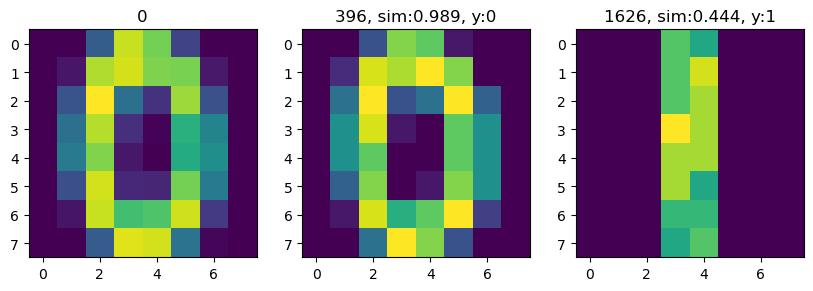

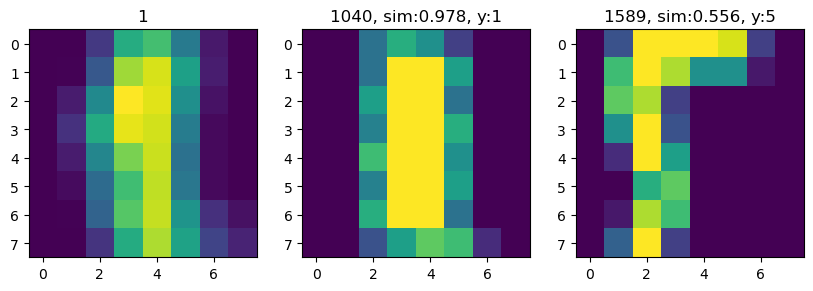

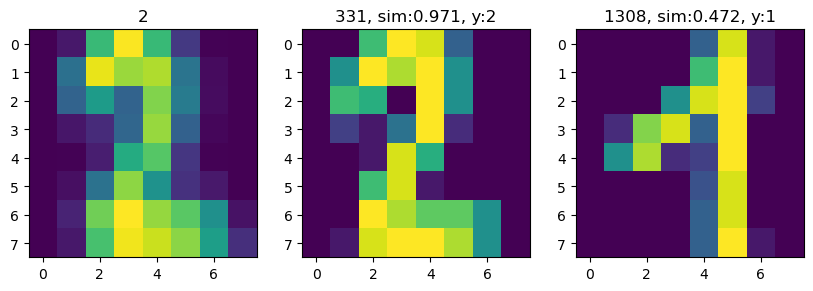

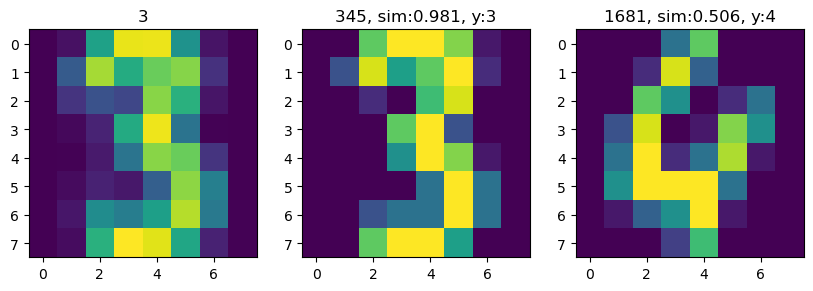

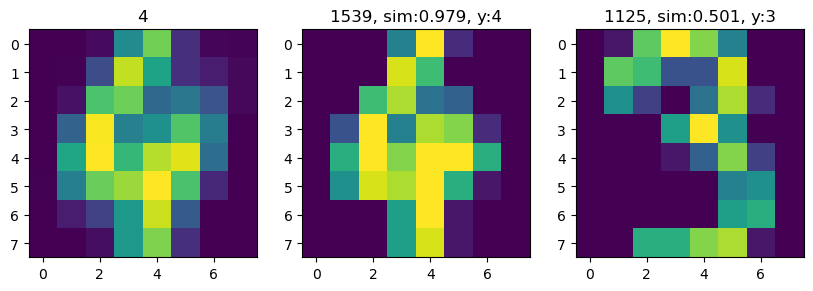

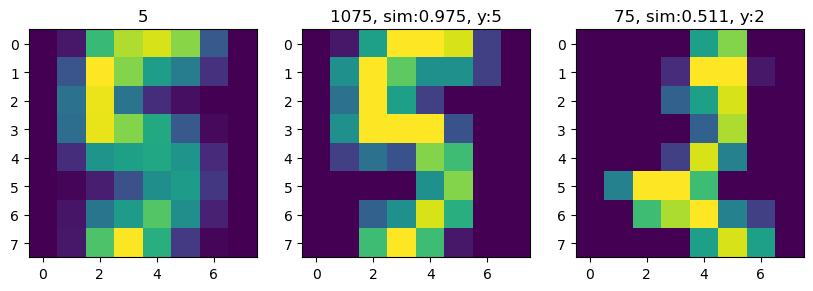

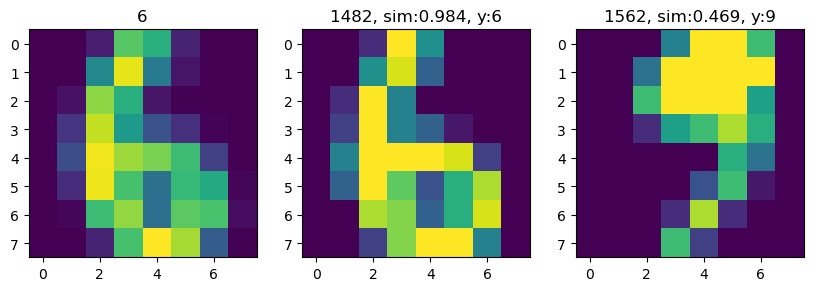

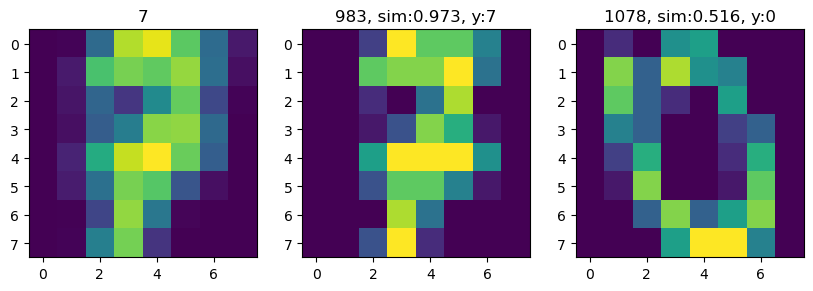

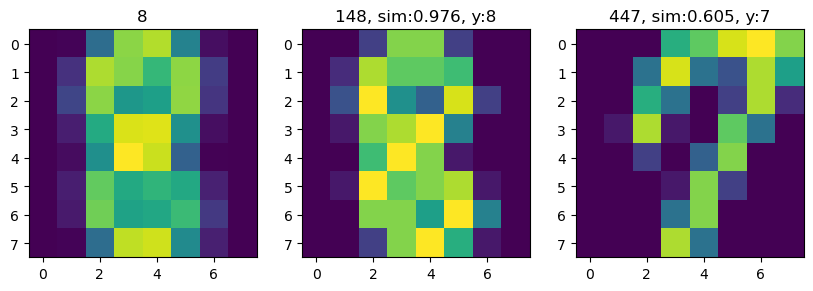

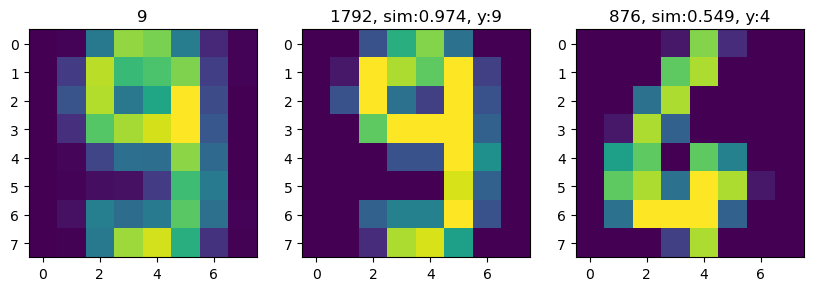

In [13]:
#4.4

similarities = raw_mean_csm
X = digits.data
for i in range(0, 10):

    min_idx = np.argmin(similarities[:,i])
    max_idx = np.argmax(similarities[:,i])

    fig, axs = plt.subplots(1,3,figsize=(10,10))
    
    # reference image
    axs[0].set_title(f"{i}")        
    axs[0].imshow(mean_imgs[i].reshape(8,8))
    
    # image and data with highest similarity to reference
    axs[1].set_title(f"{max_idx}, sim:{similarities[max_idx, i]:.3f}, y:{digits.target[max_idx]}")
    axs[1].imshow(X[max_idx].reshape(8,8))
    
    # image and data with lowest similarity to reference
    axs[2].set_title(f"{min_idx}, sim:{similarities[min_idx, i]:.3f}, y:{digits.target[min_idx]}")
    axs[2].imshow(X[min_idx].reshape(8,8))

plt.show()

In [14]:
#5
N = len(digits.data)
NUM_TRAINING = int(np.ceil(N * 0.7))
X_TRAINING, X_TEST = digits.data[:NUM_TRAINING], digits.data[NUM_TRAINING:]
Y_TRAINING, Y_TEST = digits.target[:NUM_TRAINING], digits.target[NUM_TRAINING:]

print(len(X_TRAINING), len(X_TEST), len(X_TRAINING) + len(X_TEST), len(digits.data))

1258 539 1797 1797


In [15]:
from sklearn.neighbors import KNeighborsClassifier
K = 5
classifier = KNeighborsClassifier(n_neighbors=K, algorithm='brute')
classifier.fit(X_TRAINING, Y_TRAINING)

y_prediction = classifier.predict(X_TEST)

distances, neighbors = classifier.kneighbors(X_TEST) 

report = metrics.classification_report(Y_TEST, y_prediction) 
confusion_matrix = metrics.confusion_matrix(Y_TEST, y_prediction)

accuracy = metrics.accuracy_score(Y_TEST, y_prediction)

# print(f"Accuracy score: {accuracy:.2f}")
print(f"Report:\n{report}")
print(f"Confusion Matrix\n{confusion_matrix}")
print(f"8: \nY={confusion_matrix[:, 8]}\nX={confusion_matrix[8, :]}")
# print(f"distances: {distances} {distances.shape}" )

Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.95      0.98      0.96        53
           2       0.98      0.96      0.97        53
           3       0.96      0.92      0.94        53
           4       0.98      0.96      0.97        56
           5       0.95      0.98      0.96        56
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        54
           8       0.96      0.90      0.93        52
           9       0.96      0.95      0.95        55

    accuracy                           0.96       539
   macro avg       0.96      0.96      0.96       539
weighted avg       0.96      0.96      0.96       539

Confusion Matrix
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  1]
 [ 1  0 51  1  0  0  0  0  0  0]
 [ 0  0  1 49  0  1  0  1  1  0]
 [ 0  0  0  0 54  0  0  1  1  0]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  0  0  0  0  

/Users/emilholm/.pyenv/versions/anaconda3-2023.09-0/envs/ml-labs/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'UMAP projection of the Digits dataset')

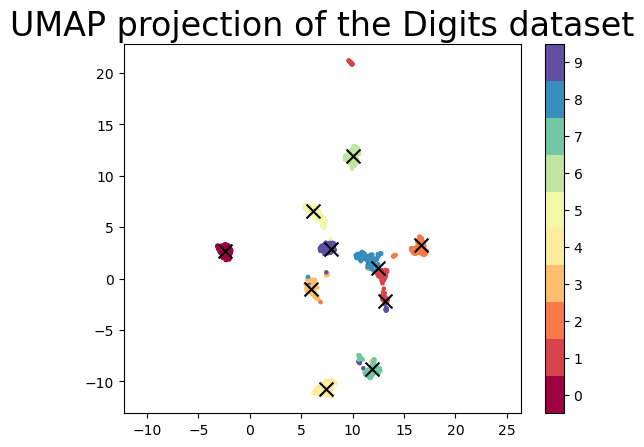

In [16]:
# 7
from sklearn.cluster import KMeans

n_clusters = 10

kmeans_classifier = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_classifier.fit(X_TRAINING)

clusters = kmeans_classifier.cluster_centers_

# Cluster Centers
reducer = umap.UMAP(random_state=42)
reducer.fit(np.concatenate((clusters, X_TRAINING)))
embedding = reducer.transform(np.concatenate((clusters, X_TRAINING)))

# Data
mid_points = embedding[:n_clusters]
data_points = embedding[n_clusters:]

plt.scatter(data_points[:, 0], data_points[:, 1], c=Y_TRAINING, cmap='Spectral', s=5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.scatter(mid_points[:, 0], mid_points[:, 1], c='black', marker='x',s=100)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Digits dataset', fontsize=24)

In [18]:
y_cluster_predict = kmeans_classifier.predict(X_TEST)

print(f"Completeness Score: {metrics.completeness_score(Y_TEST, y_cluster_predict):.2f}")
print(f"Homogeneity Score: {metrics.homogeneity_score(Y_TEST, y_cluster_predict):.2f}")
print(f"Adjusted Mutual Information Score: {metrics.adjusted_mutual_info_score(Y_TEST, y_cluster_predict):.2f}")
confusion_matrix = metrics.confusion_matrix(Y_TEST, y_prediction)

print(f"{confusion_matrix}")

Completeness Score: 0.74
Homogeneity Score: 0.73
Adjusted Mutual Information Score: 0.72
[7 0 8 3 1 3 0 4 0 2 2 4 6 6 6 6 0 4 1 0 2 5 5 2 1 7 5 1 5 7 9 6 8 2 1 3 4
 5 1 7 5 6 8 7 0 3 4 5 1 7 9 6 8 2 0 3 4 5 1 7 1 0 0 3 0 7 1 5 1 5 2 5 4 4
 8 0 5 7 7 8 8 4 5 8 7 9 1 3 8 8 4 8 8 2 3 3 3 2 1 5 1 7 1 3 6 5 8 7 7 9 4
 3 8 6 5 4 2 3 8 5 8 1 5 4 3 5 2 8 5 2 7 0 8 3 1 3 5 4 0 2 2 4 1 5 6 6 1 4
 1 0 2 5 5 2 1 7 5 7 9 6 8 2 0 3 4 1 1 7 9 6 8 2 1 3 4 1 1 7 9 6 8 2 1 3 4
 1 1 7 1 1 1 3 1 7 1 1 1 1 2 9 4 4 8 1 9 7 7 6 6 4 9 6 7 9 6 3 8 8 4 8 8 2
 3 3 3 2 1 9 1 7 1 0 6 1 6 7 7 9 4 3 8 6 9 4 2 3 8 9 8 1 9 4 3 1 2 8 9 2 7
 1 8 3 1 3 9 4 1 2 2 4 6 1 6 6 1 4 1 0 2 1 4 2 8 7 4 1 1 7 5 6 8 2 0 9 5 5
 9 7 5 1 8 2 0 3 9 7 5 6 8 2 0 5 4 0 9 2 9 0 0 3 0 7 0 5 0 5 2 5 4 4 5 0 5
 7 7 7 6 5 5 8 7 5 6 3 0 4 4 4 5 2 3 3 3 4 9 5 0 7 1 0 8 5 7 5 4 3 8 6 5 4
 4 3 8 5 8 4 5 4 3 5 2 8 5 2 7 0 8 3 8 3 5 4 0 2 2 4 6 6 0 4 8 0 0 2 0 7 5
 0 4 7 5 6 8 9 1 3 4 8 1 7 5 6 5 2 0 3 4 5 1 7 5 6 0 2 2 3 4 5 1 7 1 0 0 3
 0 7 8 1 1 